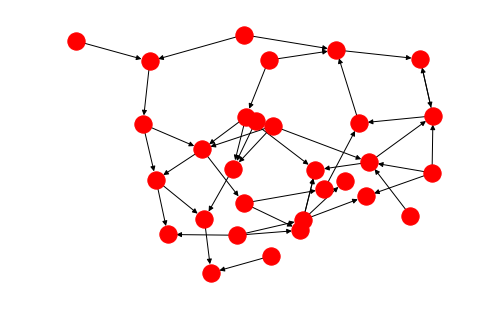

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Using the Erdos Renyi random network, as per the Study guide
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))

In [24]:
n = 1000000 # total steps
alpha = 0.85 # default alpha 

# creating the 'num_visits' property for each node to store the number of visist
for n in g.nodes:
    g.nodes[n]['num_visits'] = 0

def surfer(g,n,alpha):

    # starting the surfer on a random node in the network
    node = random.choice(list(g.nodes))

    for i in range(n):
        g.nodes[node]['num_visits'] += 1

        # If the current node has no neighbors, or if the random number
        # falls outside of probability alpha, i.e. with probability (1 – α),
        # move the surfer to a random node in the network.
        if alpha < np.random.rand() and len(list(g.neighbors(node))) == 0:
            node = np.random.choice(list(g.nodes))

        else: 
        # If the current node has neighbors,
        # move the surfer to a random neighbor of the current node.
        # (implied with probability α)
            node = np.random.choice(list(g.neighbors(node)))

    # visits storage for plotting
    num_visits = []
    
    for i in g.nodes:
        num_visits.append(g.nodes[i]['num_visits'])

    return num_visits

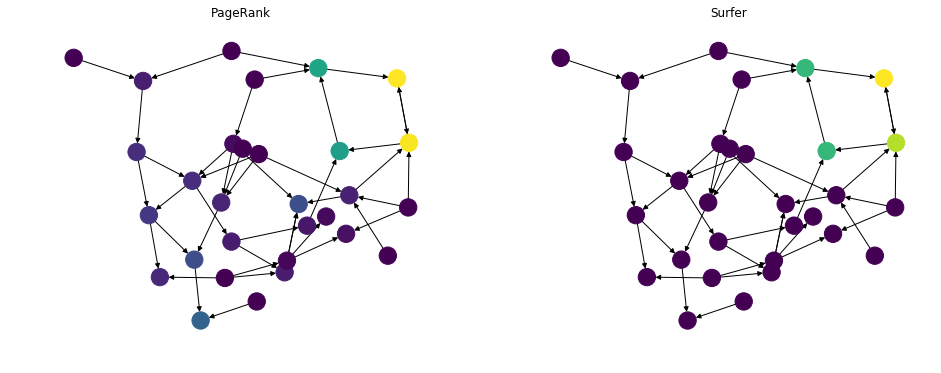

In [25]:
surfer_visits = surfer(g,n,alpha)

# Calculating PageRank for the Erdos Renyi random network, as per the Study guide
pagerank = nx.pagerank(g)
page_rank_visits = [pagerank[i] for i in g.nodes()]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("PageRank")
nx.draw(g, pos=nx.kamada_kawai_layout(g),node_color=page_rank_visits)
plt.subplot(1,2,2)
plt.title("Surfer")
nx.draw(g, pos=nx.kamada_kawai_layout(g),node_color=surfer_visits)
plt.show()